In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
train = pd.read_csv('../Train/train_set_one_hot_rf_leaf_index.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,leaf_index_26,leaf_index_27,leaf_index_28,leaf_index_29,leaf_index_30,leaf_index_31,leaf_index_32,leaf_index_33,leaf_index_34,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,4,11,3,11,11,6,3,10,11,3
1,8,900,2812,2,10,8,7,0,1,0,...,6,11,3,11,6,10,6,13,10,2
2,21,363,8973,2,10,5,5,0,1,0,...,6,11,3,11,11,10,3,10,11,3
3,22,418,10694,2,10,6,5,0,1,0,...,7,11,3,11,11,11,7,11,10,2
4,11,131,1488,3,30,8,9,1,0,0,...,6,13,3,10,10,10,7,13,13,3


In [4]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
cat = CatBoostClassifier(silent=True, random_seed=123)
cat.fit(X_train, y_train)

preds = cat.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.720170


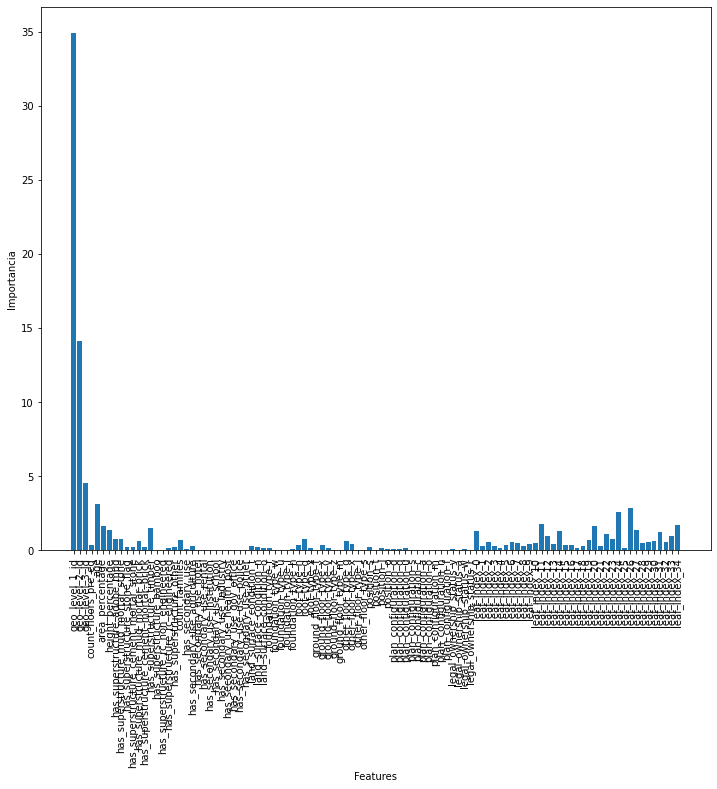

In [6]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, cat.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.show()